In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [12]:
df=pd.read_csv('car data.csv')

In [13]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [14]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [15]:
df.shape

(301, 9)

In [16]:
df.size

2709

In [17]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [19]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [20]:
df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [21]:
print(df.Fuel_Type.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [22]:
print(df.Seller_Type.value_counts())

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


In [23]:
print(df.Transmission.value_counts())

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [24]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])
df['Seller_Type']=le.fit_transform(df['Seller_Type'])
df['Transmission']=le.fit_transform(df['Transmission'])

In [25]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [31]:
x=df.drop(['Car_Name','Selling_Price'],axis=1)
y=df['Selling_Price']

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [34]:
models={
    'svr':SVR(),
    'Linear Regressor':LinearRegression(),
    'Random Forest Regressor':RandomForestRegressor(),  
    'Decision Tree Classifier':DecisionTreeRegressor(), 
    'Xgboost Regressor':XGBRegressor(use_label_encoder=False,eval_metrics='mlogloss')
}

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

for name, model in models.items():
    print('='*50)
    print('Model:', name)

    # Train model
    model.fit(x_train, y_train)

    # Predict
    y_pred = model.predict(x_test)

    # Regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print('Mean Absolute Error (MAE):', mae)
    print('Mean Squared Error (MSE):', mse)
    print('R2 Score:', r2)


Model: svr
Mean Absolute Error (MAE): 3.154553693873984
Mean Squared Error (MSE): 25.230437706614197
R2 Score: -0.09528098513804495
Model: Linear Regressor
Mean Absolute Error (MAE): 1.2217615462341203
Mean Squared Error (MSE): 3.528927253898143
R2 Score: 0.8468053957654174
Model: Random Forest Regressor
Mean Absolute Error (MAE): 0.6100950819672135
Mean Squared Error (MSE): 0.8374162898360653
R2 Score: 0.9636468399966821
Model: Decision Tree Classifier
Mean Absolute Error (MAE): 0.7098360655737704
Mean Squared Error (MSE): 1.122272131147541
R2 Score: 0.9512809353650644
Model: Xgboost Regressor
Mean Absolute Error (MAE): 0.6087348267484883
Mean Squared Error (MSE): 0.8908275012364599
R2 Score: 0.961328200703924


C:\Users\Dell\anaconda3\envs\notebook\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:43:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [37]:
model=RandomForestRegressor()

model.fit(x_train,y_train)

RandomForestRegressor()

In [38]:
y_pred=model.predict(x_test)

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)


MAE: 0.6019065573770496
MSE: 0.857530313934426
R2 Score: 0.9627736681403029


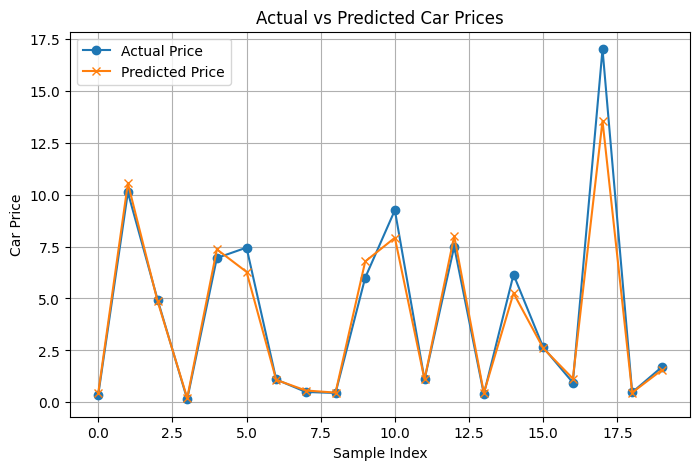

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(y_test.values[:20], label='Actual Price', marker='o')
plt.plot(y_pred[:20], label='Predicted Price', marker='x')
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Sample Index')
plt.ylabel('Car Price')
plt.legend()
plt.grid(True)
plt.show()
